In [1]:
import numpy as np
from pbcpy.base import Cell
from pbcpy.grid import Grid, ReciprocalGrid, Grid_Function
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
at = np.identity(3)*5
cell = Cell(at)

In [11]:
nr = [61,61,61]
grid = Grid(at, nr)
invgrid = ReciprocalGrid(grid.bg,nr,grid.units)

In [12]:
dens = Grid_Function(grid=grid,reciprocal_grid=invgrid)

In [13]:
alpha=0.1

In [14]:
def r_square(grid,center):
    return np.einsum('ijkl,ijkl->ijk',grid.r-center,grid.r-center)

In [15]:
dens.values = (1.0/(alpha*np.sqrt(2.0*np.pi)))*np.exp(-r_square(grid,[2.5,2.5,2.5])/(2.0*alpha**2))

In [16]:
Fdens = dens.fft()*grid.dV

In [17]:
indx = np.where(invgrid.gg**2 > 0)

In [18]:
vh=np.zeros(invgrid.gg.shape,dtype=complex)
vh[indx] = Fdens[indx] * 4.0 * np.pi / invgrid.gg[indx]**2

In [19]:
vh_plot = Grid_Function(grid=grid,reciprocal_grid=invgrid)

In [20]:
vh_plot.reciprocal_values=vh

In [21]:
vh_real = vh_plot.ifft()*invgrid.dV

In [22]:
vh_test = np.zeros(vh_real.shape,dtype=float)

In [23]:
vh_test = (1/np.sqrt(r_square(grid,[2.5,2.5,2.5])))+np.min(np.real(vh_real))

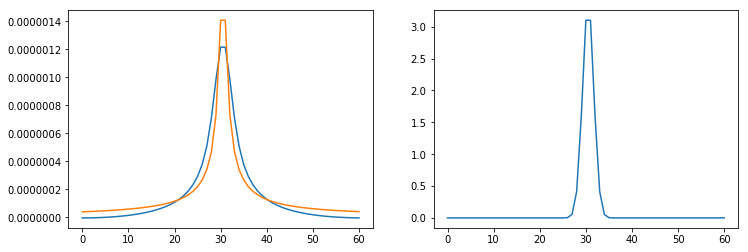

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(np.real(vh_real[:,30,30]))
ax1.plot(vh_test[:,30,30]/10000000)
ax2.plot(dens.values[:,30,30])
plt.show()